In [30]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.1.2
Numpy Version: 1.19.2
Seaborn Version: 0.11.0


In [31]:
all_trips = pd.read_csv("../data/all_trips.csv")
frequent_user_trips = pd.read_csv("../data/frequent_user_trips.csv")
casual_user_trips = pd.read_csv("../data/casual_user_trips.csv")

In [32]:
all_trips['user_type'] = all_trips.user_type.astype('category')

In [33]:
all_trips.sample(5)

,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min,...,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure,user_type
3075385,143735,C49E165D1FE74060F6CCACF9EDC9881F8E79DFEC,2015-07-10 18:16:19,2015-07-10 18:28:55,Hallerstraße / Rohtenbaumchaussee,137995,Hudtwalckerstraße / Bebelallee,138378,Terminal HH_51 (-2231-),13,...,8.62,0.58,6.13,6.77,284.0,2.0,10.003,0.29,1020.300000,casual
6193093,108929,1A16AAF364A42B7114C17B3D7A103BD28CBE1603,2016-09-26 15:27:48,2016-09-26 15:35:47,Lortzingstraße/Friedrichsberger Straße,213833,Wartenau / Lübecker Straße,140801,IVR,8,...,12.04,0.61,2.08,2.09,20.0,2.0,10.003,0.75,1018.387931,casual
3236880,110909,EFD516251516366919BC74CF60443DB704DB32B4,2015-07-31 13:40:21,2015-07-31 13:53:40,Sternschanze / Eingang Dänenweg,139501,Osterstraße/Bismarckstraße,131642,iPhone SRH,14,...,9.53,0.74,5.19,10.79,263.0,5.0,10.003,0.75,1018.400000,frequent
3641260,143656,A94A57BA9C3336EFAE1A65E601178A8AE7D3888C,2015-09-19 19:43:40,2015-09-19 20:13:57,Berliner Tor / Berlinertordamm,131652,Fischmarkt/Breite Straße,131546,Terminal HH_41 (-2645-),31,...,11.42,0.81,1.85,1.85,290.0,0.0,10.003,0.44,1020.300000,casual
4728454,110618,C19C95A2A48533E36B2BEC6FC9E8D7FB321B80AA,2016-04-21 12:38:37,2016-04-21 12:55:06,Hammerbrook / Sachsenfeld,140790,Jacobikirche / Steinstraße,131875,Android SRH,17,...,0.70,0.47,2.21,3.67,274.0,5.0,10.003,0.19,1026.300000,casual


<AxesSubplot:ylabel='count'>

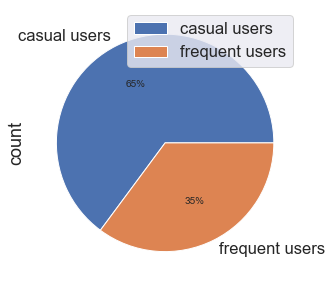

In [34]:
pd.DataFrame(
    {'count': [
        len(casual_user_trips.index), 
        len(frequent_user_trips.index)
    ]}, 
    index=['casual users', 'frequent users']
).plot.pie(y='count', autopct='%1.0f%%', figsize=(5, 5))

In [35]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7555703 entries, 0 to 7555702
Data columns (total 43 columns):
 #   Column                Dtype   
---  ------                -----   
 0   bike_id               int64   
 1   user_id               object  
 2   date_from             object  
 3   date_until            object  
 4   from_station_name     object  
 5   from_station_id       int64   
 6   to_station_name       object  
 7   to_station_id         int64   
 8   booked_via            object  
 9   duration_in_min       int64   
 10  from_year             int64   
 11  from_month            int64   
 12  from_day              int64   
 13  from_hour             int64   
 14  from_minute           int64   
 15  from_weekday          int64   
 16  until_year            int64   
 17  until_month           int64   
 18  until_day             int64   
 19  until_hour            int64   
 20  until_minute          int64   
 21  until_weekday         int64   
 22  datetime          

In [36]:
tmp = all_trips.groupby(['from_year', 'from_month']).from_station_name.nunique()
tmp = pd.DataFrame(tmp).unstack()
tmp

from_station_name                                                   \
from_month                1      2      3      4      5      6      7      8    
from_year                                                                       
2014                   130.0  130.0  132.0  132.0  131.0  131.0  131.0  133.0   
2015                   134.0  135.0  136.0  149.0  154.0  167.0  166.0  168.0   
2016                   188.0  189.0  193.0  198.0  206.0  206.0  207.0  204.0   
2017                   209.0  210.0  210.0  210.0  209.0    NaN    NaN    NaN   

                                        
from_month     9      10     11     12  
from_year                               
2014        134.0  132.0  134.0  132.0  
2015        174.0  175.0  175.0  182.0  
2016        208.0  209.0  209.0  209.0  
2017          NaN    NaN    NaN    NaN

Text(0, 0.5, 'Number of stations')

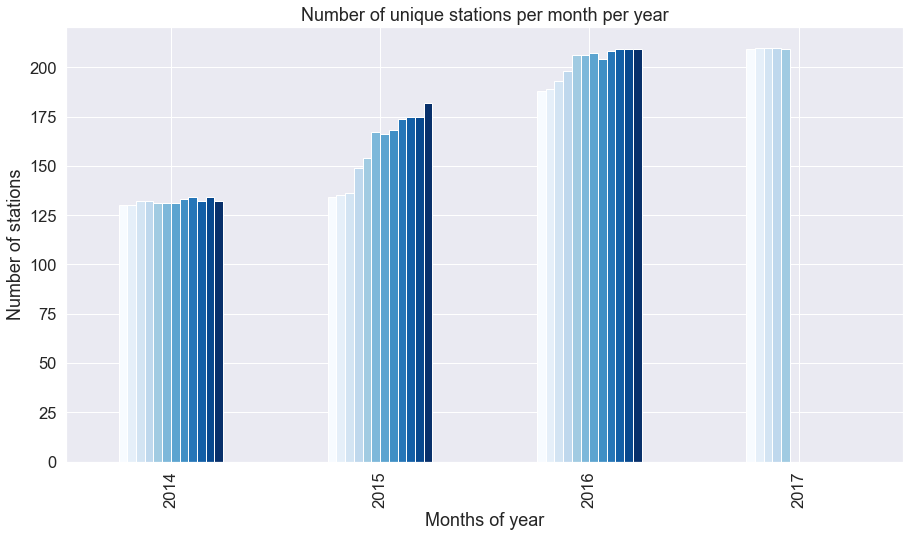

In [37]:
tmp.plot(kind='bar', figsize=(15,8), legend=False, cmap='Blues')
plt.title('Number of unique stations per month per year')
plt.xlabel('Months of year')
plt.ylabel('Number of stations')

In [38]:
tmp = all_trips.groupby(['from_year', 'from_month']).user_id.nunique()
tmp = pd.DataFrame(tmp).unstack()
tmp

user_id                                                        \
from_month       1        2        3        4        5        6        7    
from_year                                                                   
2014        19641.0  22855.0  32716.0  36690.0  40549.0  41922.0  45165.0   
2015        20737.0  22037.0  28386.0  37294.0  41161.0  45883.0  47990.0   
2016        24276.0  26572.0  32009.0  42845.0  53535.0  52686.0  54736.0   
2017        27466.0  27785.0  41947.0  45100.0  34841.0      NaN      NaN   

                                                         
from_month       8        9        10       11       12  
from_year                                                
2014        42998.0  41015.0  38056.0  29956.0  20795.0  
2015        50692.0  42256.0  38206.0  31159.0  30598.0  
2016        54063.0  55534.0  43188.0  34263.0  32012.0  
2017            NaN      NaN      NaN      NaN      NaN

Text(0, 0.5, 'Number of user IDs')

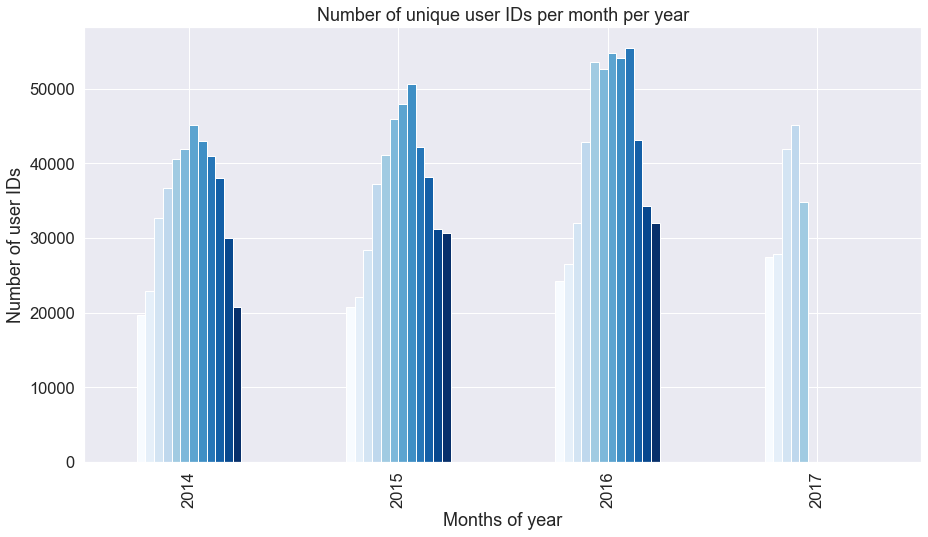

In [39]:
tmp.plot(kind='bar', figsize=(15,8), legend=False, cmap='Blues')
plt.title('Number of unique user IDs per month per year')
plt.xlabel('Months of year')
plt.ylabel('Number of user IDs')

In [40]:
tmp = all_trips.groupby(['from_year', 'from_month']).bike_id.nunique()
tmp = pd.DataFrame(tmp).unstack()
tmp

bike_id                                                          \
from_month      1       2       3       4       5       6       7       8    
from_year                                                                    
2014        1434.0  1584.0  1605.0  1601.0  1632.0  1518.0  1527.0  1472.0   
2015        1471.0  1477.0  1632.0  1595.0  1525.0  1792.0  1842.0  1771.0   
2016        1989.0  1913.0  1883.0  1946.0  1989.0  1988.0  2004.0  1965.0   
2017        2132.0  2109.0  2417.0  2504.0  2378.0     NaN     NaN     NaN   

                                            
from_month      9       10      11      12  
from_year                                   
2014        1455.0  1381.0  1336.0  1386.0  
2015        1761.0  1793.0  1831.0  1932.0  
2016        1962.0  2085.0  2178.0  2148.0  
2017           NaN     NaN     NaN     NaN

Text(0, 0.5, 'Number of bike IDs')

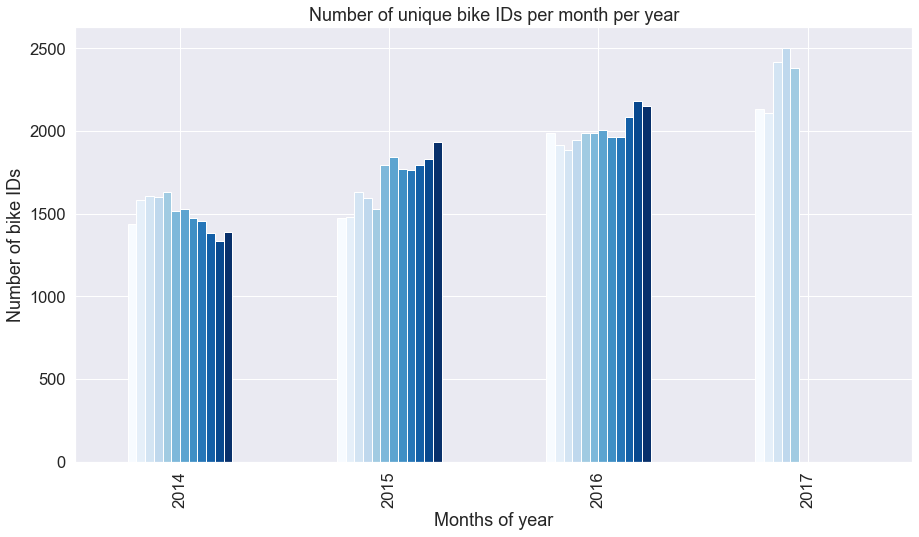

In [41]:
tmp.plot(kind='bar', figsize=(15,8), legend=False, cmap='Blues')
plt.title('Number of unique bike IDs per month per year')
plt.xlabel('Months of year')
plt.ylabel('Number of bike IDs')

<AxesSubplot:xlabel='from_weekday', ylabel='duration_in_min'>

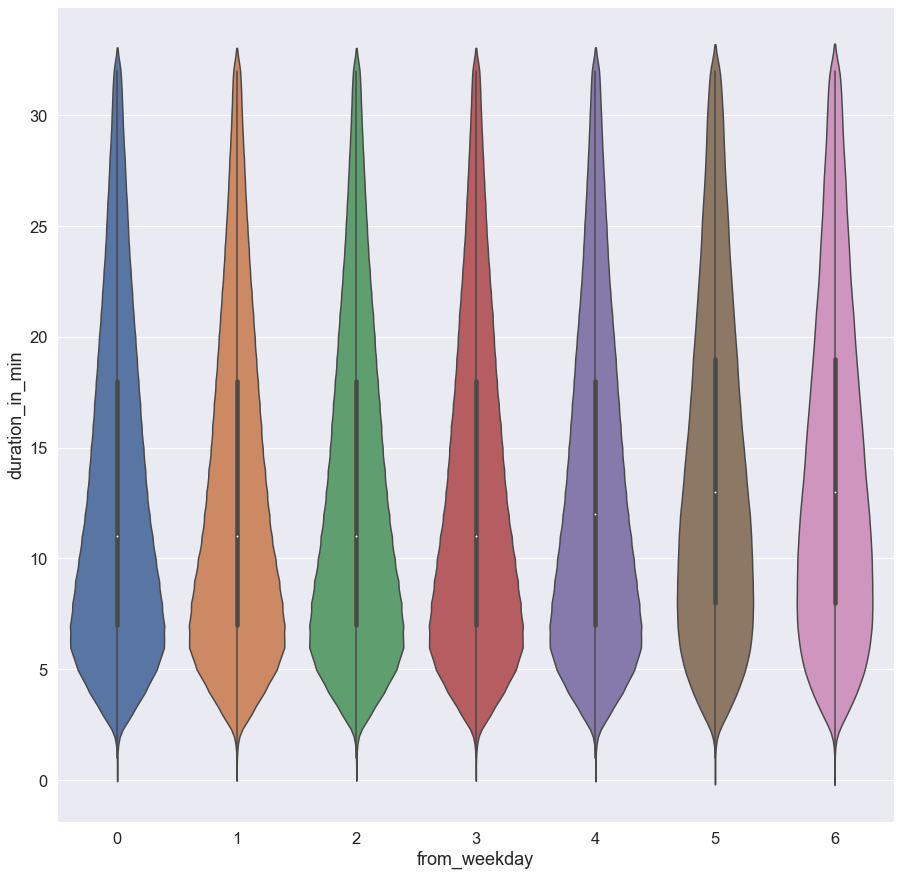

In [42]:
plt.figure(figsize=(15,15))
sns.violinplot(data=frequent_user_trips, x='from_weekday', y='duration_in_min')

<AxesSubplot:xlabel='duration_in_min', ylabel='Count'>

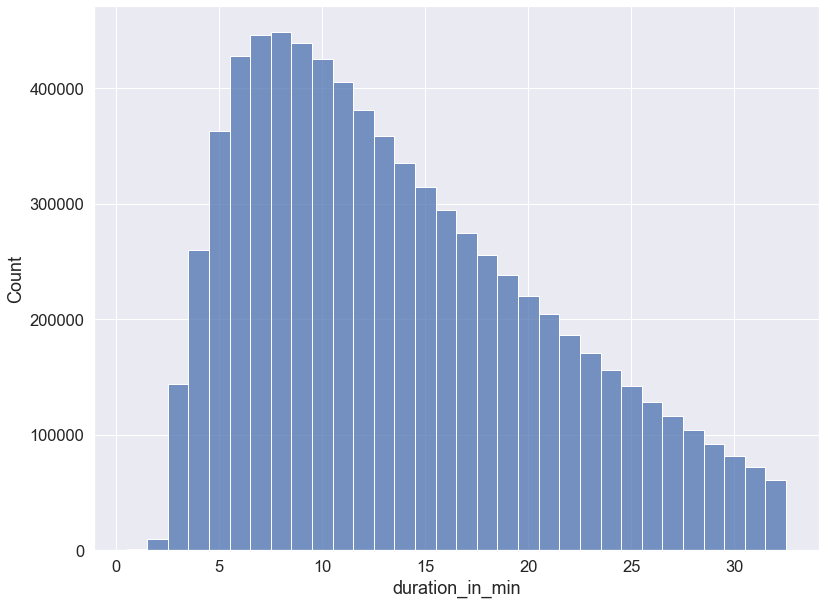

In [43]:
plt.figure(figsize=(13, 10))
sns.histplot(all_trips['duration_in_min'], discrete=True)

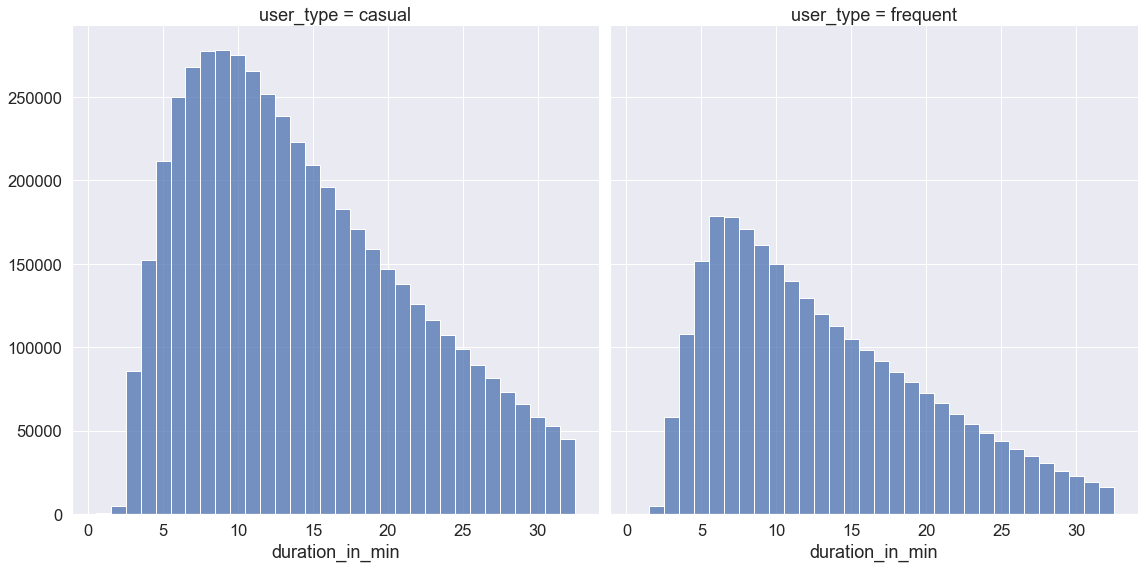

In [44]:
g = sns.FacetGrid(all_trips, col='user_type', height=8)
g.map(sns.histplot, 'duration_in_min', discrete=True)
g.savefig('figures/test.png')

<AxesSubplot:xlabel='from_month', ylabel='count'>

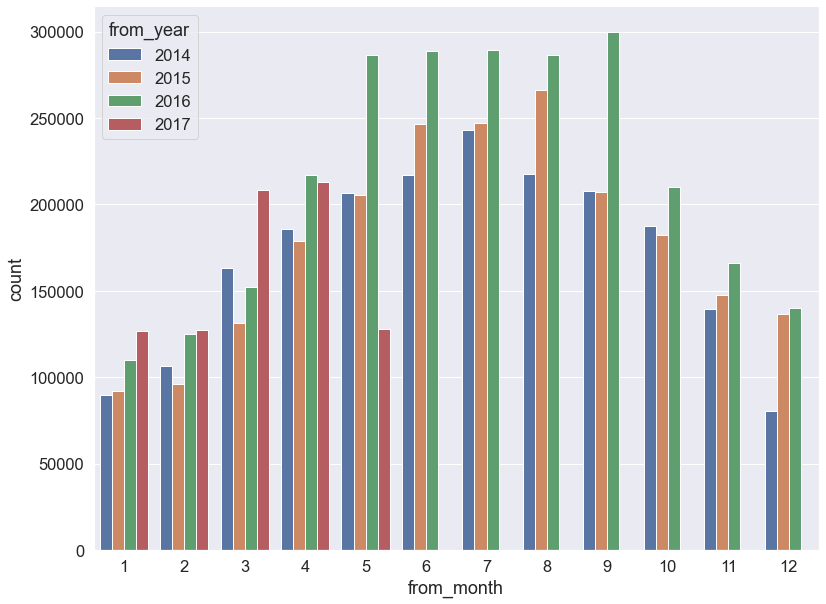

In [45]:
plt.figure(figsize=(13, 10))
sns.countplot(x='from_month', hue='from_year', data=all_trips)

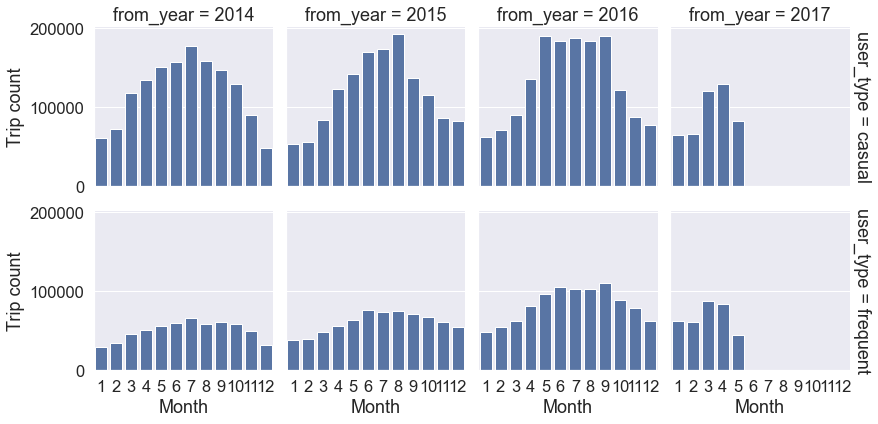

In [46]:
g = sns.FacetGrid(all_trips, col='from_year', row='user_type', margin_titles=True)
g.map(sns.countplot, 'from_month', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
g.set_axis_labels('Month', 'Trip count')

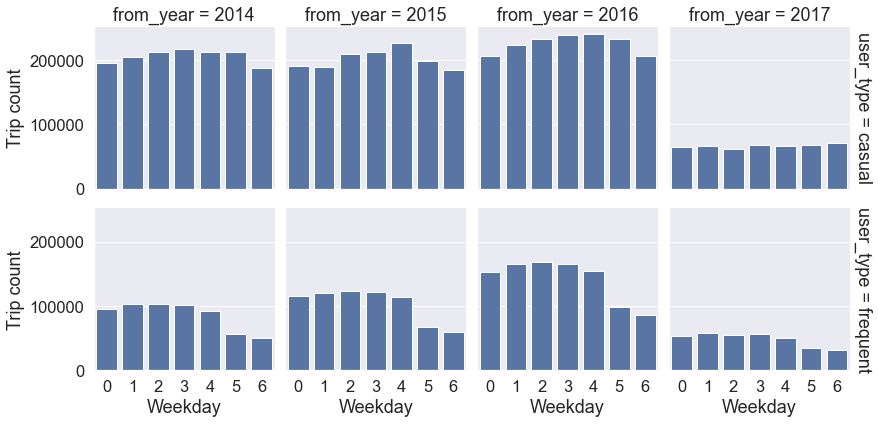

In [47]:
g = sns.FacetGrid(all_trips, col='from_year', row='user_type', margin_titles=True)
g.map(sns.countplot, 'from_weekday', order=[0, 1, 2, 3, 4, 5, 6])
g.set_axis_labels('Weekday', 'Trip count')

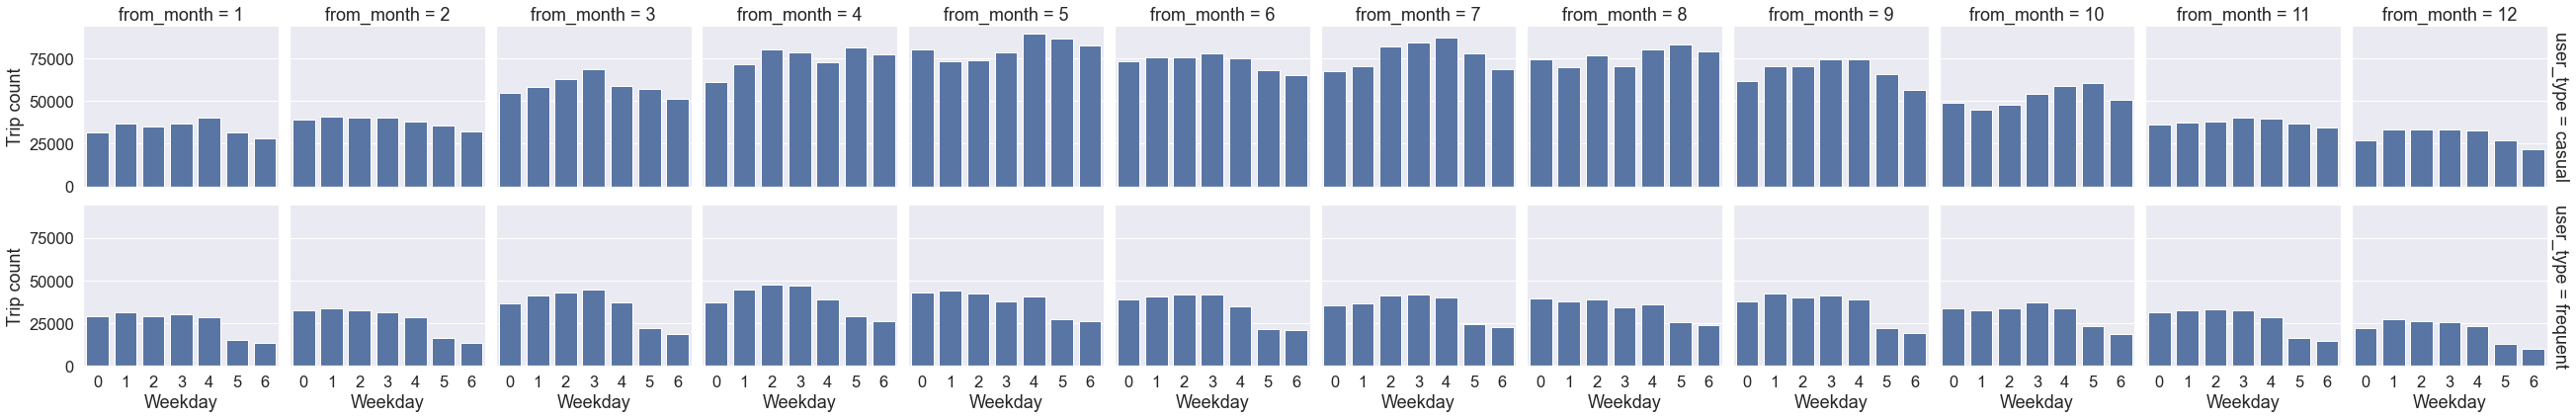

In [48]:
g = sns.FacetGrid(all_trips, col='from_month', row='user_type', margin_titles=True)
g.map(sns.countplot, 'from_weekday', order=[0, 1, 2, 3, 4, 5, 6])
g.set_axis_labels('Weekday', 'Trip count')

In [49]:
frequent_user_trips.groupby('user_id').duration_in_min.mean().sort_values()

user_id
BA0F0355B29610D8806857AF5CAD29F39C353223     2.079086
6D5FF6524B026E21536A62EADDA8826487D42DBE     3.077108
023D4D25898703EF735B35EA1634B82404921EB1     3.194286
B4CC4C582D246B2716EA5DEDB42E62B7B1BC7A6C     3.259259
54E2F1D2842FE49C1D5BDB3A9CDD184D80F730A2     3.336735
                                              ...    
1DD19276449D25A9A5386D5F20207C9EB189C1C1    27.900000
9A99FDD8E3F27B38FEE326569F0D11261E0776B4    28.769029
42A40688783331241CD6F3A2803BD6C0756A80AF    29.086957
757F879FC96233AB1D27EF995F97AD67FDDDD400    29.379310
30AD45F743474BAC6C64B2B20D0F067D489C339B    30.200000
Name: duration_in_min, Length: 14305, dtype: float64

In [50]:
casual_user_trips.groupby('user_id').duration_in_min.mean().sort_values()

user_id
6DEA47A4C49ABB25ECB6B2E3DDAB31A95077F6E0     1.0
53372DA4C746CABA2206A0486709FBAC7B755FE1     1.0
0C0258118E445EE675EDEDA5E17B750DBE6C6FD1     1.0
92F0A80420D9DA7AFB199DDB1188C52DCAA3E31F     1.0
22BC0D4DBD4A130DCE9C0475A712A7CE7710C44B     1.0
                                            ... 
F7B7ED6C2F33E230DF124D59C861A0D0F51767F8    32.0
3AB1111470807F53A5372123E00B683C0798AC4F    32.0
18E3657F644FF28A5E557502F8C583142C4CB789    32.0
6502994114F5F409A577EF8A089961084B8C738E    32.0
F79293EA262249D5EE3C0AA04E30AFAC1EE86232    32.0
Name: duration_in_min, Length: 211140, dtype: float64

<AxesSubplot:>

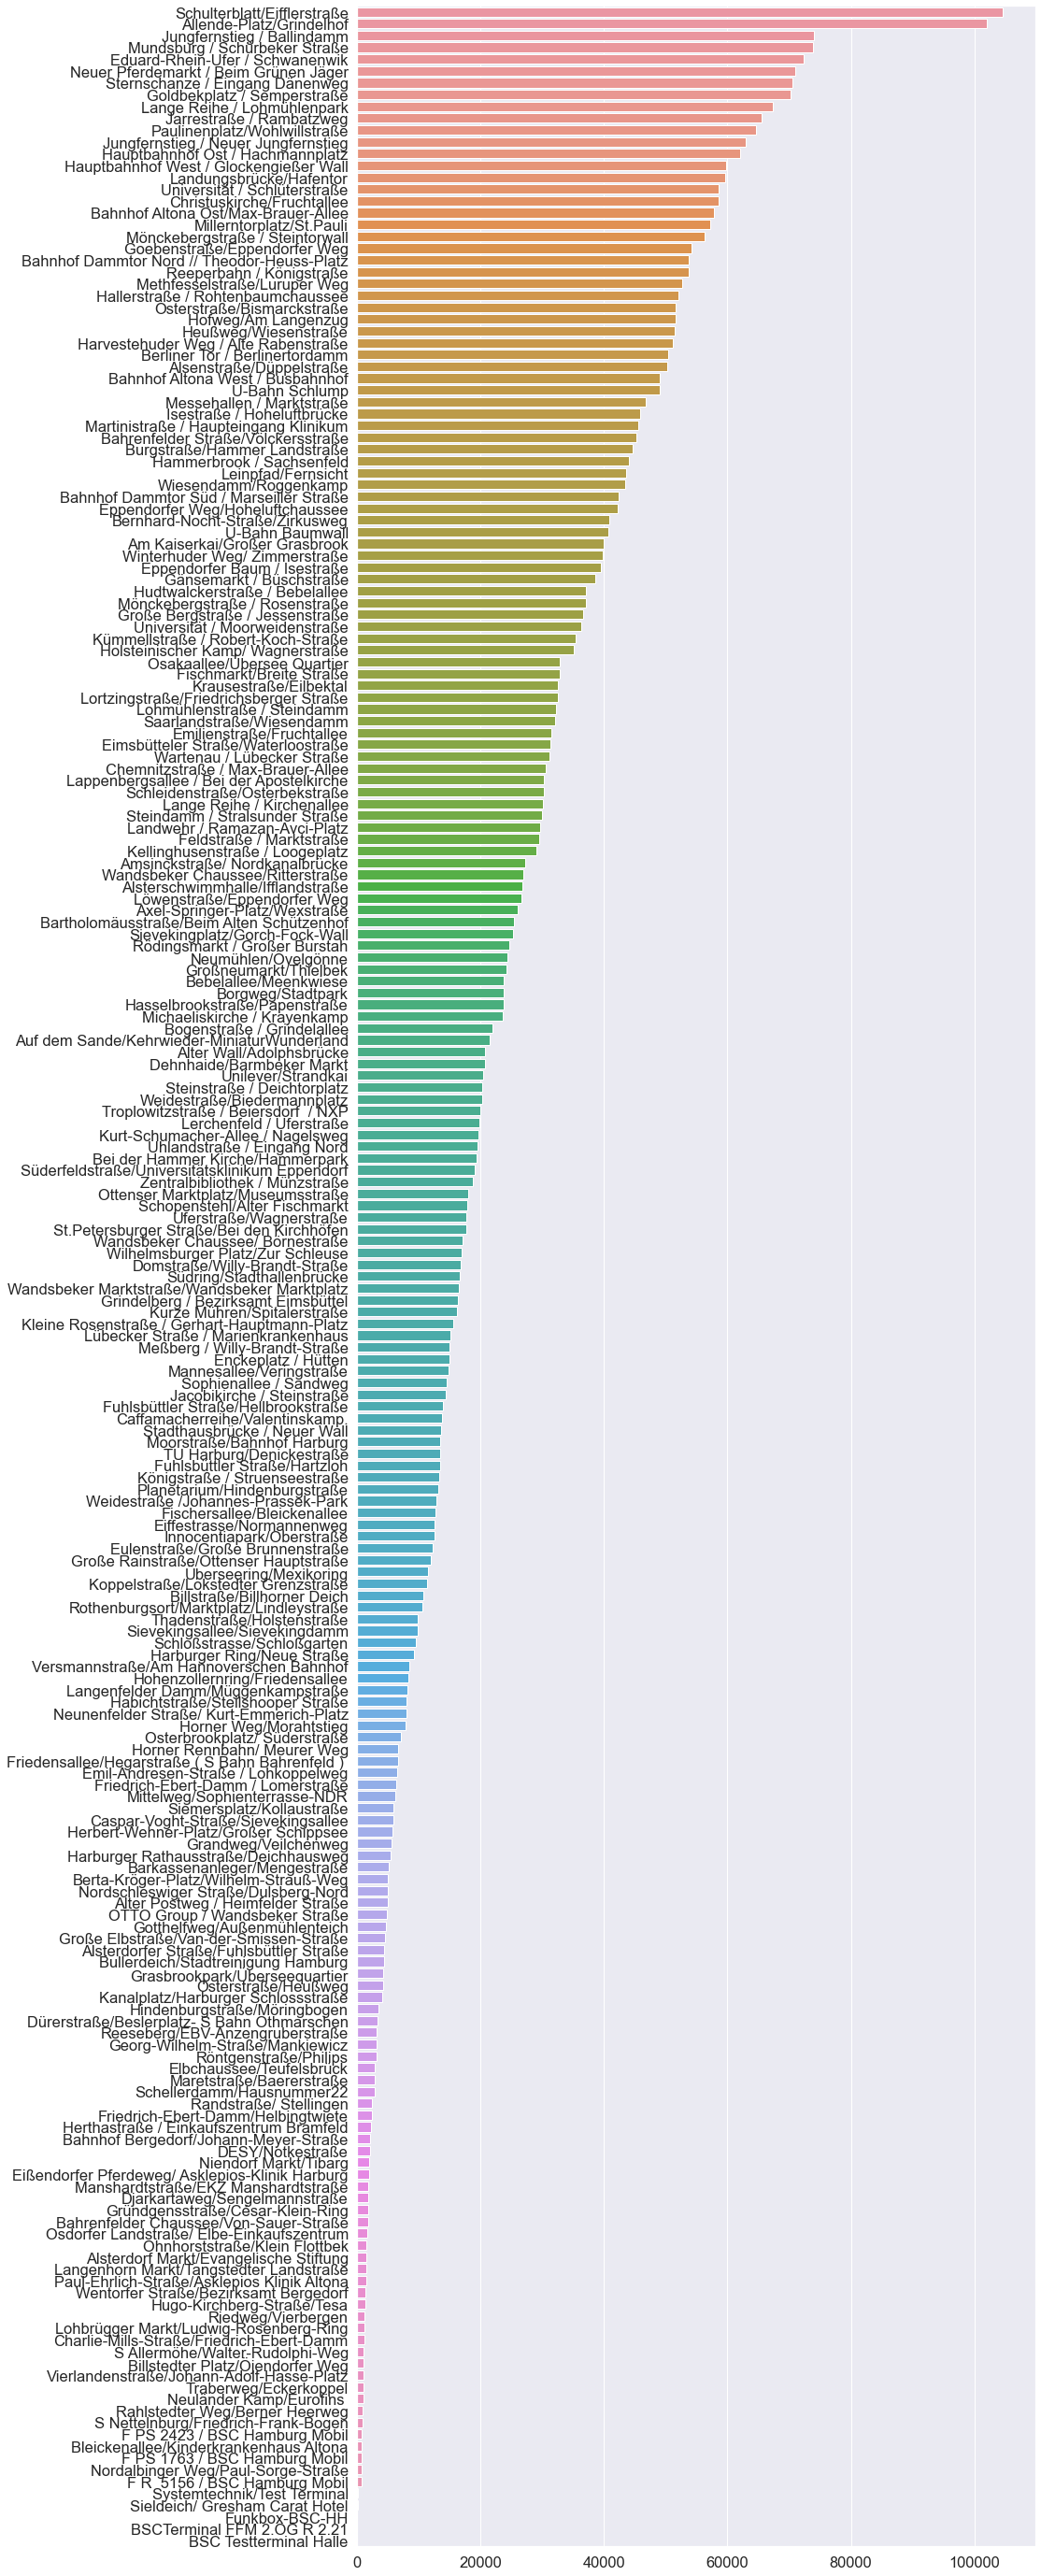

In [51]:
count = casual_user_trips['from_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

<AxesSubplot:>

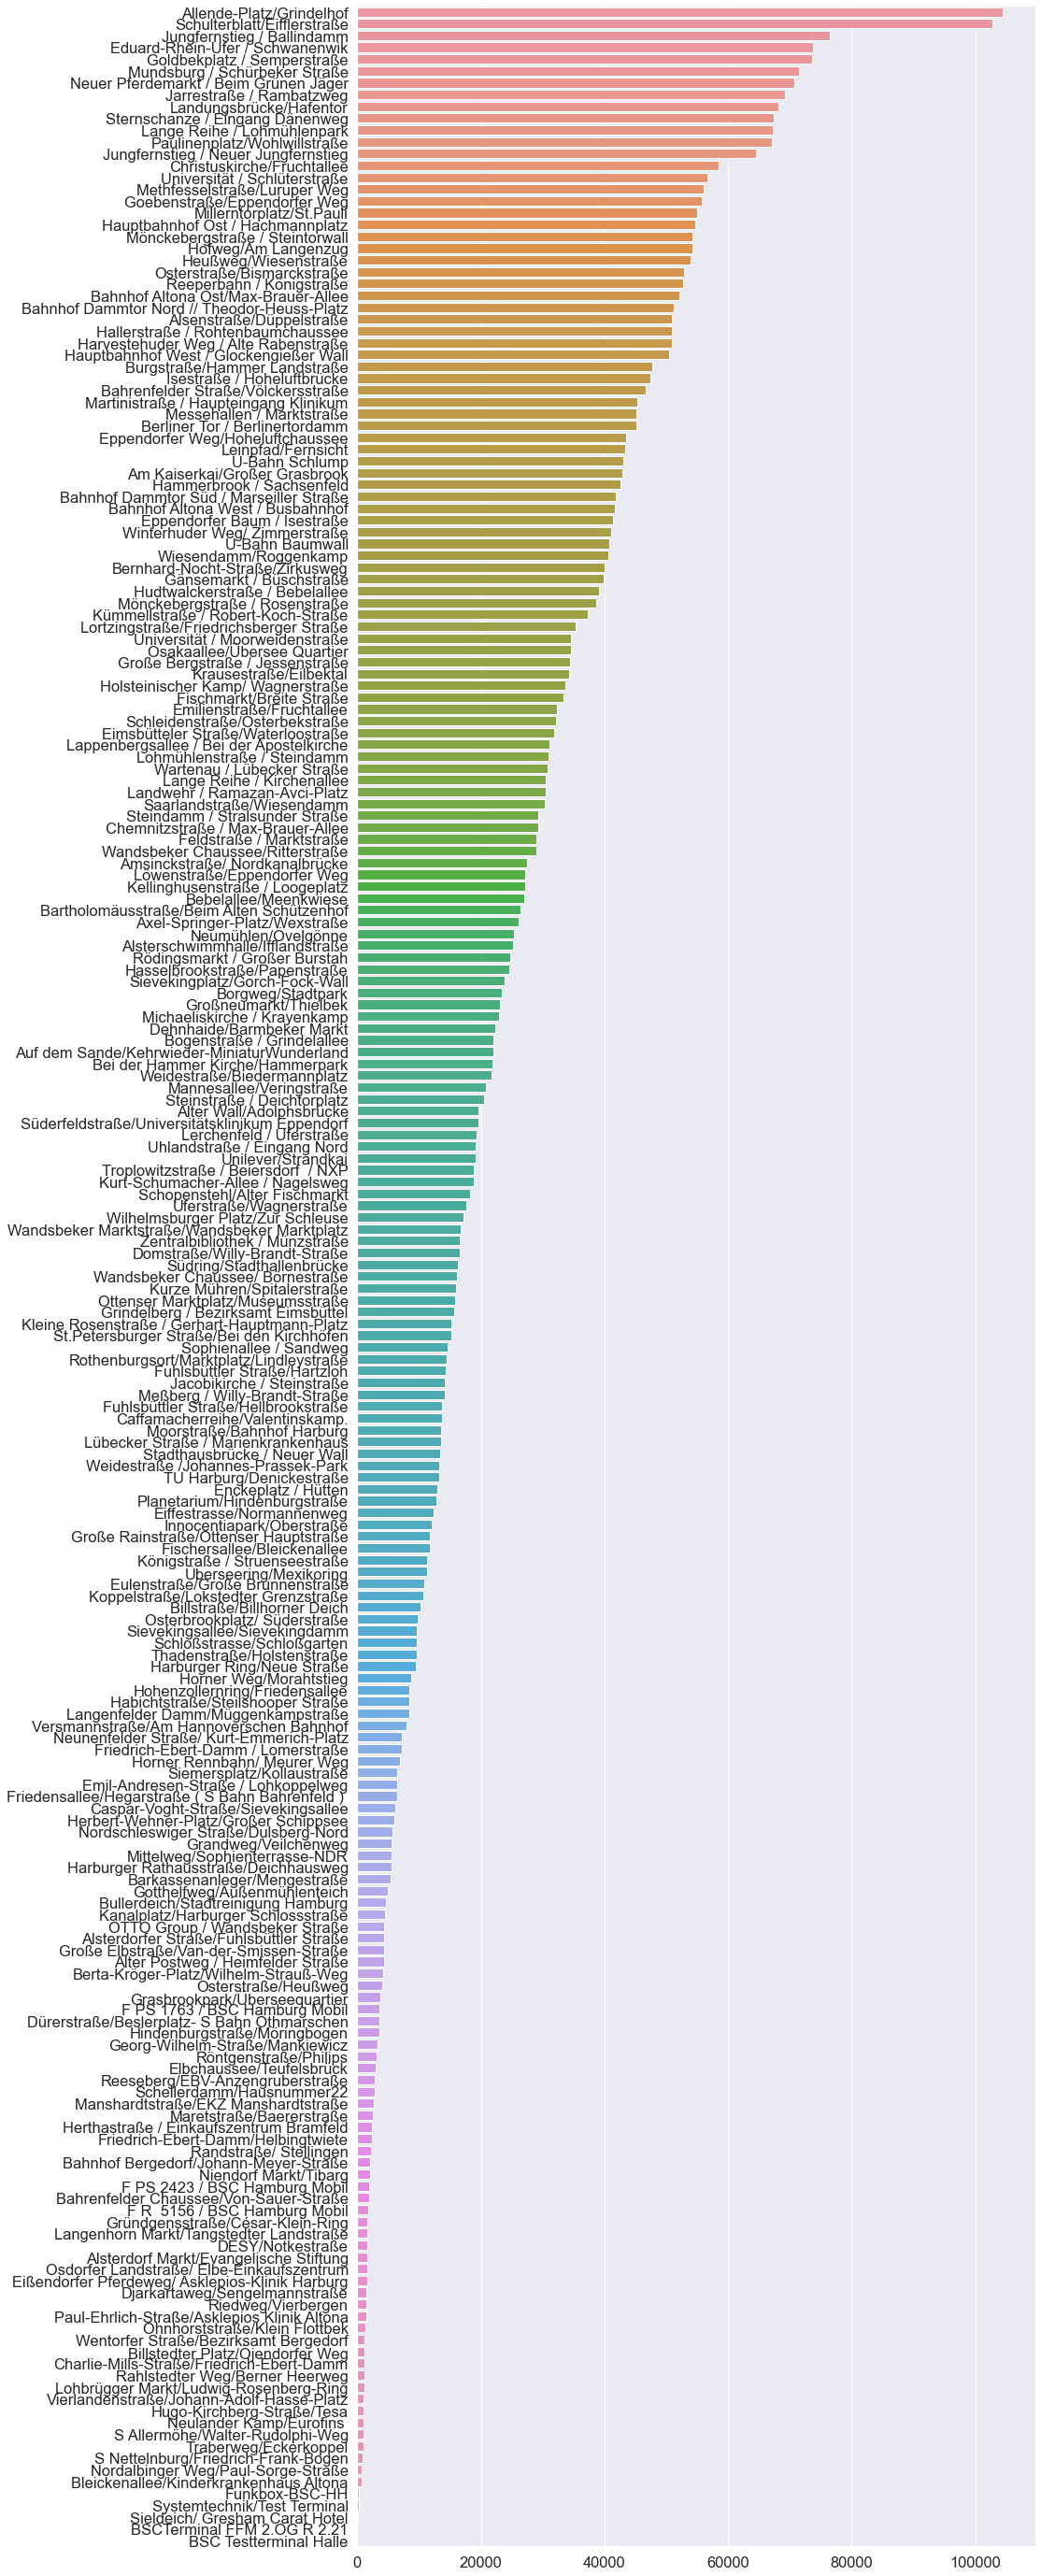

In [52]:
count = casual_user_trips['to_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

<AxesSubplot:>

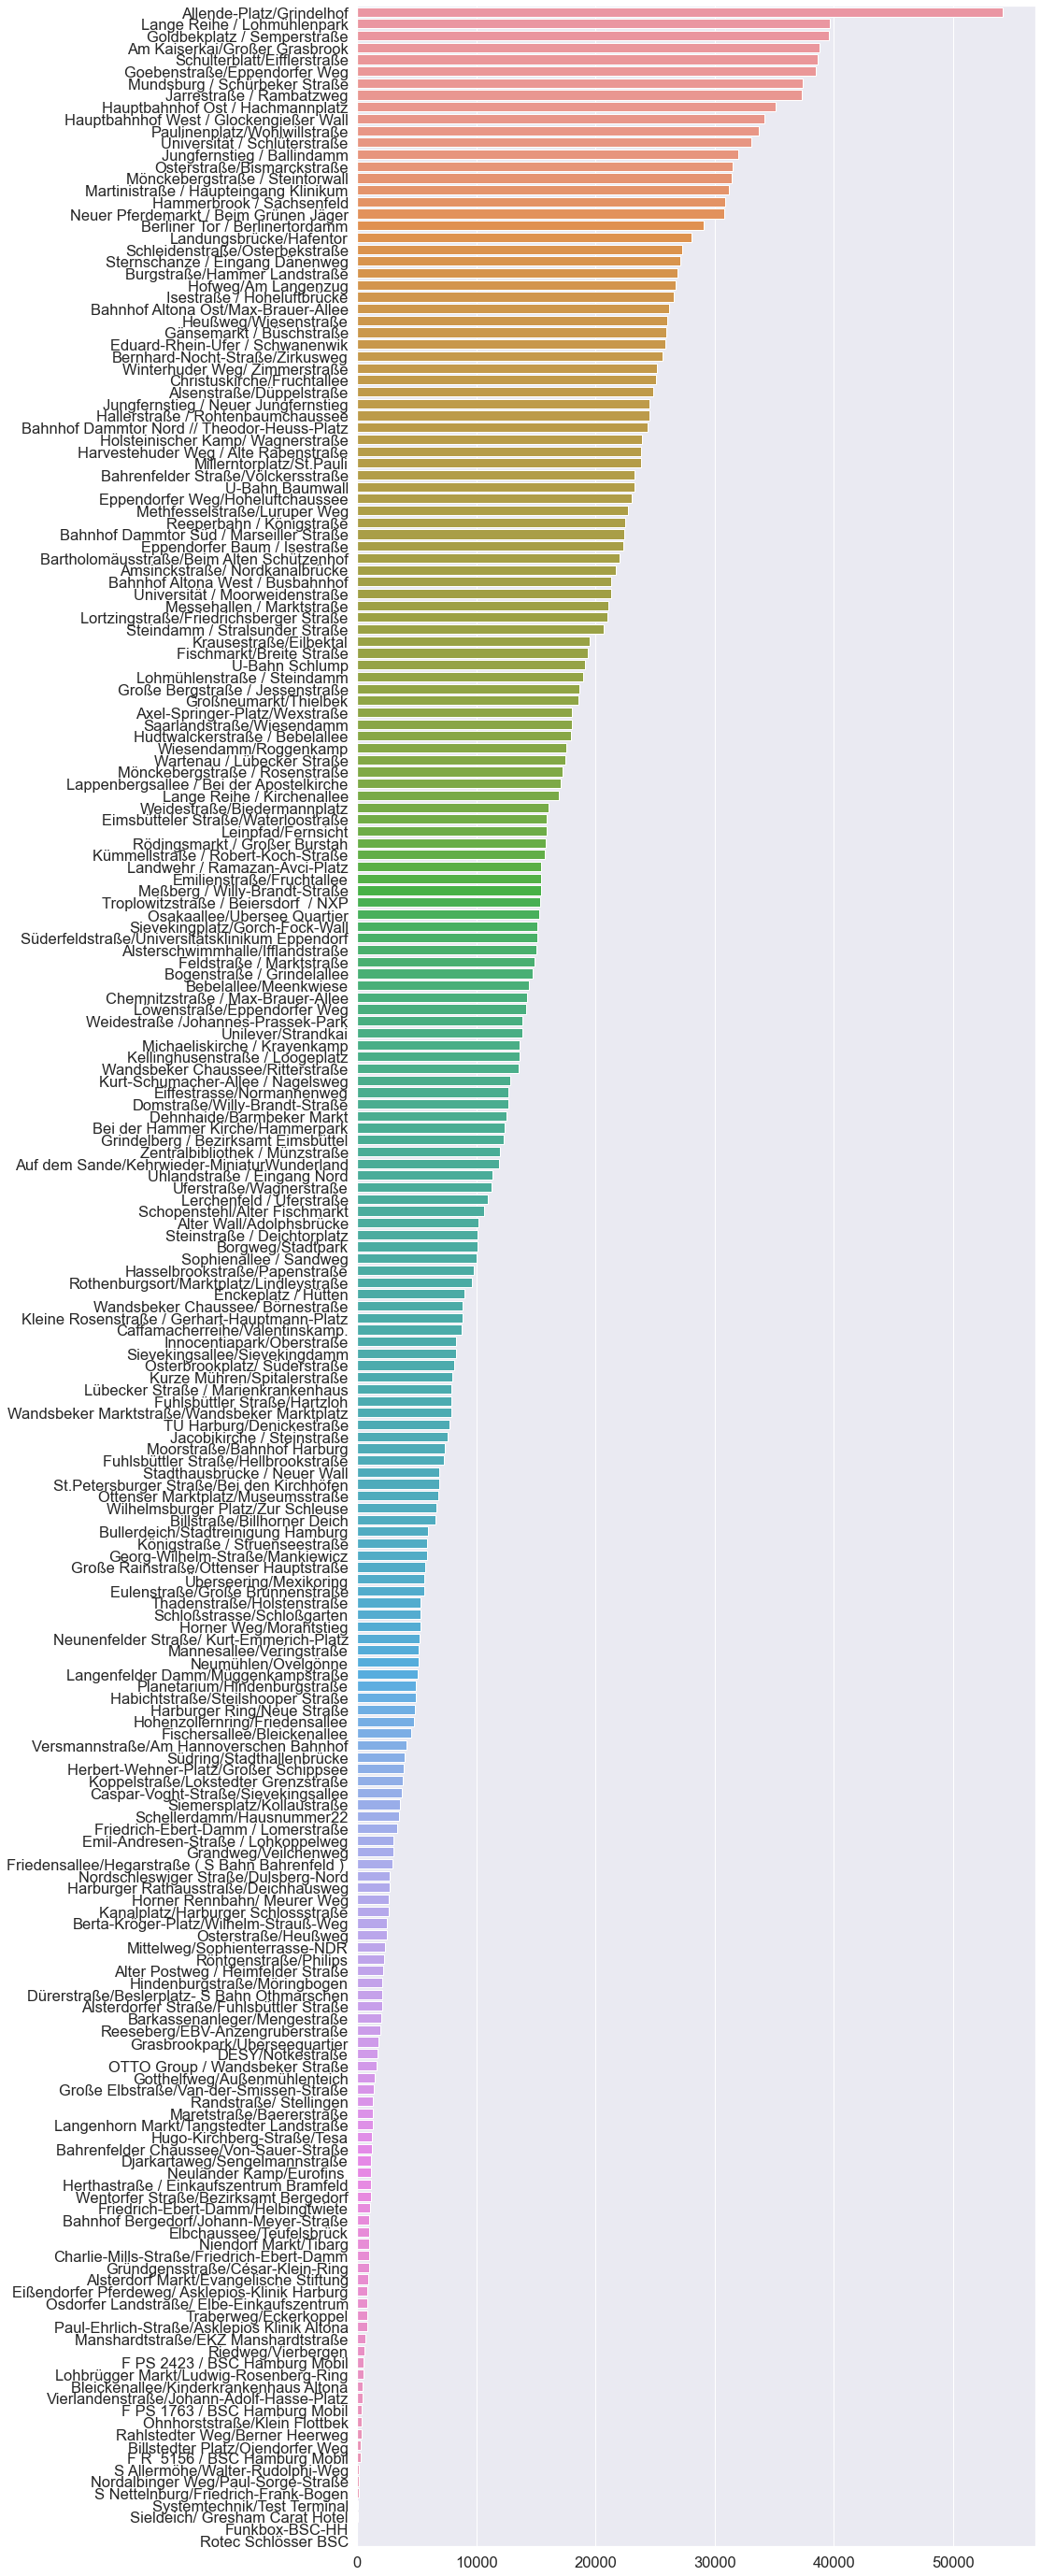

In [53]:
count = frequent_user_trips['from_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

<AxesSubplot:>

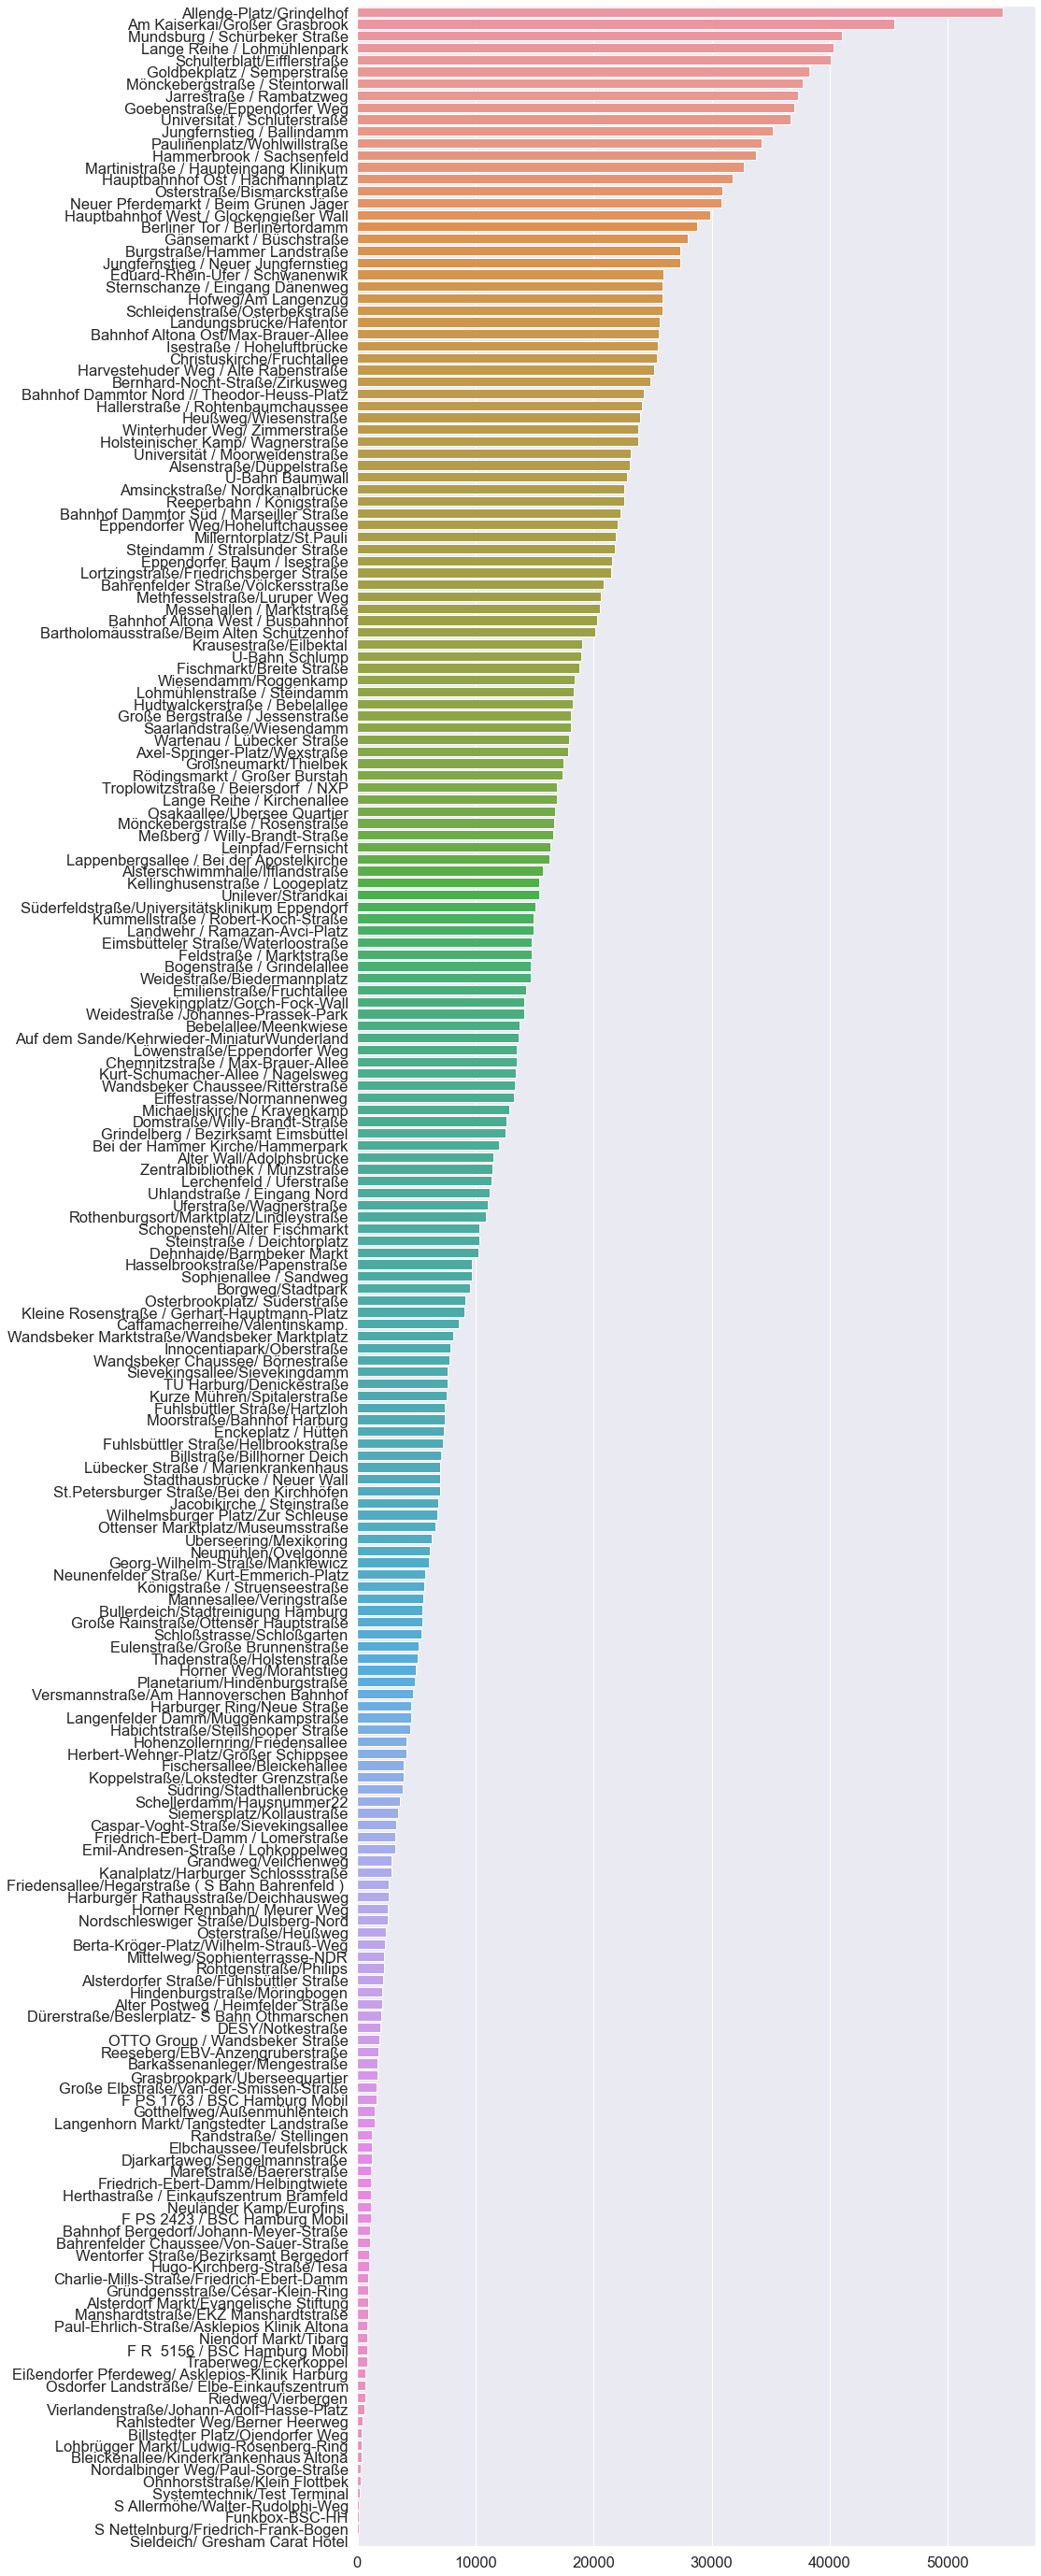

In [54]:
count = frequent_user_trips['to_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

In [55]:
frequent_user_trips.groupby(['from_station_name', 'to_station_name']).size().sort_values(ascending=False).head(30)

from_station_name                               to_station_name                          
Bahrenfelder Straße/Völckersstraße              Bahnhof Altona West / Busbahnhof             8151
Saarlandstraße/Wiesendamm                       Schleidenstraße/Osterbekstraße               7797
Schleidenstraße/Osterbekstraße                  Saarlandstraße/Wiesendamm                    7428
Landungsbrücke/Hafentor                         Am Kaiserkai/Großer Grasbrook                6922
Meßberg / Willy-Brandt-Straße                   Am Kaiserkai/Großer Grasbrook                6491
U-Bahn Baumwall                                 Am Kaiserkai/Großer Grasbrook                5783
Bartholomäusstraße/Beim Alten Schützenhof       Mundsburg / Schürbeker Straße                5746
Am Kaiserkai/Großer Grasbrook                   Meßberg / Willy-Brandt-Straße                5729
Krausestraße/Eilbektal                          Lortzingstraße/Friedrichsberger Straße       5632
Am Kaiserkai/Großer Grasbroo

In [56]:
casual_user_trips.groupby(['from_station_name', 'to_station_name']).size().sort_values(ascending=False).head(30)

from_station_name                       to_station_name                       
Bahrenfelder Straße/Völckersstraße      Bahnhof Altona West / Busbahnhof          11367
Bahnhof Altona West / Busbahnhof        Bahrenfelder Straße/Völckersstraße        10443
Hallerstraße / Rohtenbaumchaussee       Universität / Schlüterstraße               7949
Saarlandstraße/Wiesendamm               Schleidenstraße/Osterbekstraße             7702
Mundsburg / Schürbeker Straße           Winterhuder Weg/ Zimmerstraße              7529
Winterhuder Weg/ Zimmerstraße           Mundsburg / Schürbeker Straße              7032
Allende-Platz/Grindelhof                Sternschanze / Eingang Dänenweg            6956
U-Bahn Baumwall                         Am Kaiserkai/Großer Grasbrook              6780
Mundsburg / Schürbeker Straße           Jarrestraße / Rambatzweg                   6765
Sternschanze / Eingang Dänenweg         Allende-Platz/Grindelhof                   6652
Wiesendamm/Roggenkamp                   J

In [68]:
station_count = pd.read_csv("../data/station_count.csv")
corr = station_count.corr()

<AxesSubplot:>

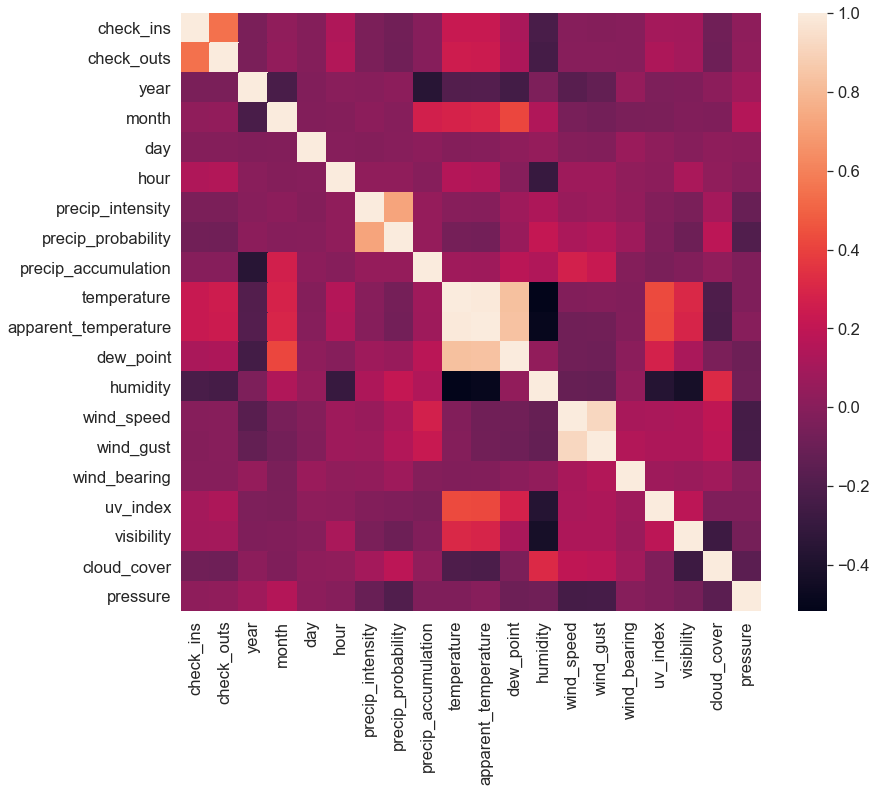

In [70]:
plt.figure(figsize=(13,11))
sns.heatmap(corr)